In [52]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio
import os
import h5py
from PIL import Image
from tkinter import filedialog
from tkinter import *

root = Tk()
root.withdraw()
data_filename =  filedialog.askopenfilename(title = "Select data file", filetypes = (("HDF5 files","*.hdf5"),))

#Load in the respective H5 file
f = h5py.File(filename, 'r')

# Get the data, C is denoised and deconvolved, F_dff is the raw signal converted to df/f
data = f['estimates/C']


#Scanbox event frame data 
mat_filename = filedialog.askopenfilename(title = "Select event file", filetypes = (("Matlab files","*.mat"),))
mat_data = spio.loadmat(mat_filename, struct_as_record=False)
frames = mat_data['info'][0,0].frame


#Lick and event timing data in milliseconds from start
lick_filename =  filedialog.askopenfilename(title = "Select arduino output file", filetypes = (("txt files","*.txt"),))
licks = np.loadtxt(lick_filename, skiprows=1)

In [ ]:
#After data load we need cut up data relative to events
#I can use odd and even as a logic source as the first event is always air and the second water



In [46]:
#Then we have to correlate to licking data

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

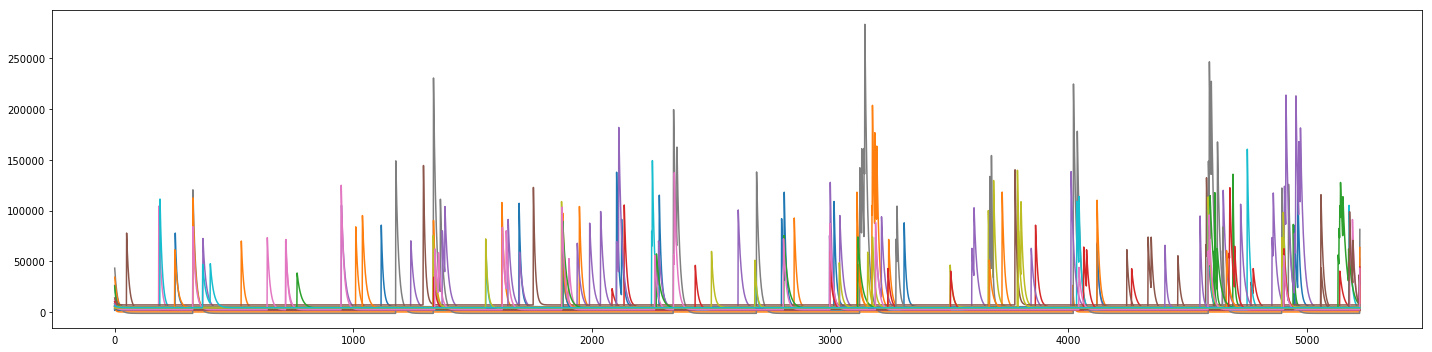

In [2]:
#All cells, all trials
fig, ax =  plt.subplots(figsize=(20,5))
im = ax.plot(F_dff[:].T)

fig.tight_layout()
#plt.savefig('hal3_102819_2.svg')
plt.show()

In [ ]:
#All cells, avg trial
fig, ax =  plt.subplots(figsize=(10,10))
im = ax.imshow(avg_trial)

cbar = ax.figure.colorbar(im, ax=ax)

plt.ylabel('Cell number')
plt.xlabel('Frames (15.49 Hz)')
plt.title('Average cell activity across trials, 2D1 day 1')
cbar.ax.set_ylabel('df/f')
fig.tight_layout()
plt.savefig('2D1_day1-avgcells.png')
plt.show()
    

In [ ]:
#Single cell, all trials
for cell_num in range(len(F_dff)):
    s_cell = trials[cell_num,:,:].T

    fig, ax =  plt.subplots(figsize=(6,4))
    im = ax.imshow(s_cell)

    cbar = ax.figure.colorbar(im, ax=ax)

    plt.ylabel('Trials')
    plt.xlabel('Frames (15.49 Hz)')
    plt.title('Single cell activity across trials, Cell #:{0} Day 1'.format(cell_num))
    cbar.ax.set_ylabel('df/f')
    fig.tight_layout()
    sname = '2D1_day1-{0}.png'.format(cell_num) 
    plt.savefig(sname)
    plt.show()
    


In [ ]:
#Plot average cell activity of just D1 cells
d1_list = [12,24,25,29,32,34,36,39]
d1_avg = np.zeros((len(d1_list),max(frames)))

counter = 0

for cell in d1_list:
    d1_avg[counter,:] = avg_trial[cell,:]
    counter = counter + 1

#D1 cells, avg trial
fig, ax =  plt.subplots(figsize=(10,2))
im = ax.imshow(d1_avg)

cbar = ax.figure.colorbar(im, ax=ax)

plt.ylabel('Cell number')
plt.xlabel('Frames (15.49 Hz)')
plt.title('Average D1 cell activity across trials, 2D1 day 1 (Example)')
cbar.ax.set_ylabel('df/f')
fig.tight_layout()
plt.savefig('2D1_day1example-avgD1cells.png')
plt.show()    






In [ ]:
#Plot group average activity of D1 cells
d1_grp = np.zeros((len(d1_list),max(frames),len(frames)))

counter = 0

for cell in d1_list:
    d1_grp[counter,:,:] = trials[cell,:,:]
    counter = counter + 1

d1_grp_avg = d1_grp.mean(0)

    
#Day1 active cells, avg trial
fig, ax =  plt.subplots(figsize=(9,3))
im = ax.imshow(d1_grp_avg.T)

cbar = ax.figure.colorbar(im, ax=ax)

plt.ylabel('Trial')
plt.xlabel('Frames (15.49 Hz)')
plt.title('Average D1 group activity across trials, 2D1 day 1')
cbar.ax.set_ylabel('df/f')
fig.tight_layout()
plt.savefig('2D1_day1-avgd1group.png')
plt.show()    

In [ ]:
#Plot average cell activity of just D2 cells
d2_list = [3,5,8,9,11,18,19,20,22,26,28,30,31,37,38]
d2_avg = np.zeros((len(d2_list),max(frames)))

counter = 0

for cell in d2_list:
    d2_avg[counter,:] = avg_trial[cell,:]
    counter = counter + 1

#D2 cells, avg trial
fig, ax =  plt.subplots(figsize=(10,2))
im = ax.imshow(d2_avg)

cbar = ax.figure.colorbar(im, ax=ax)

plt.ylabel('Cell number')
plt.xlabel('Frames (15.49 Hz)')
plt.title('Average D2 cell activity across trials, 2D1 day 1 (Example)')
cbar.ax.set_ylabel('df/f')
fig.tight_layout()
plt.savefig('2D1_day1example-avgD2cells.png')
plt.show()    



In [ ]:
#Plot group average activity of D2 cells
d2_grp = np.zeros((len(d2_list),max(frames),len(frames)))

counter = 0

for cell in d2_list:
    d2_grp[counter,:,:] = trials[cell,:,:]
    counter = counter + 1

d2_grp_avg = d2_grp.mean(0)

    
#Day1 active cells, avg trial
fig, ax =  plt.subplots(figsize=(9,3))
im = ax.imshow(d2_grp_avg.T)

cbar = ax.figure.colorbar(im, ax=ax)

plt.ylabel('Trial')
plt.xlabel('Frames (15.49 Hz)')
plt.title('Average D2 group activity across trials, 2D1 day 1')
cbar.ax.set_ylabel('df/f')
fig.tight_layout()
plt.savefig('2D1_day1-avgd2group.png')
plt.show()    

In [ ]:
#Plot average cell activity of active cells for classification
day1_list = [106,107,108,109,110,111,112,118,119,120,121,122,123,124,133,134,135,136,137,139,140,141,142,149,160,161,187,188,189,190,191,192,193,194,195,196,197,199,203,205,206,208,209,210,212,214,219,220,225,231,232,233,237,239,240]
day1_avg = np.zeros((len(day1_list),max(frames)))

counter = 0

for cell in day1_list:
    day1_avg[counter,:] = avg_trial[cell,:]
    counter = counter + 1

#Day1 active cells, avg trial
fig, ax =  plt.subplots(figsize=(15,5))
im = ax.imshow(day1_avg)

cbar = ax.figure.colorbar(im, ax=ax)

plt.ylabel('Cell number')
plt.xlabel('Frames (15.49 Hz)')
plt.title('Average active cell activity across trials, 2D1 day 1')
cbar.ax.set_ylabel('df/f')
fig.tight_layout()
plt.savefig('2D1_day1-avggoodcells.png')
plt.show()    


In [ ]:
#Single cell, all trials for active cells
for cell_num in day1_list:
    s_cell = trials[cell_num,:,:].T

    fig, ax =  plt.subplots(figsize=(6,3))
    im = ax.imshow(s_cell)

    cbar = ax.figure.colorbar(im, ax=ax)

    plt.ylabel('Trials')
    plt.xlabel('Frames (15.49 Hz)')
    plt.title('Single cell activity across trials, Cell #:{0} Day 1 (Active)'.format(cell_num))
    cbar.ax.set_ylabel('df/f')
    fig.tight_layout()
    sname = '2D1_day1-{0}_active.png'.format(cell_num) 
    plt.savefig(sname)
    plt.show()

In [ ]:
#Plot average cell activity of active Up cells for classification
up_list = [106,109,110,112,119,120,121,122,123,135,140,141,142,149,161,187,193,195,199,205,206,210]
up_avg = np.zeros((len(up_list),max(frames)))

counter = 0

for cell in up_list:
    up_avg[counter,:] = avg_trial[cell,:]
    counter = counter + 1

#Day1 active cells, avg trial
fig, ax =  plt.subplots(figsize=(15,3))
im = ax.imshow(up_avg)

cbar = ax.figure.colorbar(im, ax=ax)

plt.ylabel('Cell number')
plt.xlabel('Frames (15.49 Hz)')
plt.title('Average up cell activity across trials, 2D1 day 1')
cbar.ax.set_ylabel('df/f')
fig.tight_layout()
plt.savefig('2D1_day1-avgupcells.png')
plt.show()    


In [ ]:
#Plot average cell activity of active Down cells for classification
dwn_list = [107,108,118,124,133,134,136,137,188,189,190,196,197,208,209,212,231,239,240]
dwn_avg = np.zeros((len(dwn_list),max(frames)))

counter = 0

for cell in dwn_list:
    dwn_avg[counter,:] = avg_trial[cell,:]
    counter = counter + 1

#Day1 active cells, avg trial
fig, ax =  plt.subplots(figsize=(15,2))
im = ax.imshow(dwn_avg)

cbar = ax.figure.colorbar(im, ax=ax)

plt.ylabel('Cell number')
plt.xlabel('Frames (15.49 Hz)')
plt.title('Average down cell activity across trials, 2D1 day 1')
cbar.ax.set_ylabel('df/f')
fig.tight_layout()
plt.savefig('2D1_day1-avgdowncells.png')
plt.show()    


In [ ]:
#Plot group average activity of active Up cells for classification
up_list = [106,109,110,112,119,120,121,122,123,135,140,141,142,149,161,187,193,195,199,205,206,210]
up_grp = np.zeros((len(up_list),max(frames),len(frames)))

counter = 0

for cell in up_list:
    up_grp[counter,:,:] = trials[cell,:,:]
    counter = counter + 1

up_grp_avg = up_grp.mean(0)

    
#Day1 active cells, avg trial
fig, ax =  plt.subplots(figsize=(8,5))
im = ax.imshow(up_grp_avg.T)

cbar = ax.figure.colorbar(im, ax=ax)

plt.ylabel('Trial')
plt.xlabel('Frames (15.49 Hz)')
plt.title('Average up group activity across trials, 2D1 day 1')
cbar.ax.set_ylabel('df/f')
fig.tight_layout()
plt.savefig('2D1_day1-avgupgroup.png')
plt.show()    

In [ ]:
#Plot group average activity of active Down cells for classification
dwn_list = [107,108,118,124,133,134,136,137,188,189,190,196,197,208,209,212,231,239,240]
dwn_grp = np.zeros((len(dwn_list),max(frames),len(frames)))

counter = 0

for cell in dwn_list:
    dwn_grp[counter,:,:] = trials[cell,:,:]
    counter = counter + 1

dwn_grp_avg = dwn_grp.mean(0)

    
#Day1 active cells, avg trial
fig, ax =  plt.subplots(figsize=(8,5))
im = ax.imshow(dwn_grp_avg.T)

cbar = ax.figure.colorbar(im, ax=ax)

plt.ylabel('Trial')
plt.xlabel('Frames (15.49 Hz)')
plt.title('Average down group activity across trials, 2D1 day 1')
cbar.ax.set_ylabel('df/f')
fig.tight_layout()
plt.savefig('2D1_day1-avgdowngroup.png')
plt.show()    